## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
all_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
all_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
total_mice = all_data['Mouse ID'].nunique()
print(f"There are {total_mice} Mice.")

There are 249 Mice.


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
all_data.value_counts(['Mouse ID', 'Timepoint'])

Mouse ID  Timepoint
g989      15           2
          0            2
          10           2
          5            2
          20           2
                      ..
q610      30           1
          35           1
q633      0            1
          5            1
a203      0            1
Length: 1888, dtype: int64

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [5]:
#get rid of duplicate Mouse Id / Timepoint entries
all_data = all_data.drop_duplicates(['Mouse ID', 'Timepoint'])

In [6]:
# Checking the number of mice in the clean DataFrame.
total_mice = all_data['Mouse ID'].nunique()

print(f"There are {total_mice} Mice.")

There are 249 Mice.


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for 
#each regimen

#create a groupby object based on Drug Regimen
grouped_mice = all_data.groupby(['Drug Regimen'])

#show summary analysis of the Tumor Volume per Drug Regimen
grouped_mice_tumor = pd.DataFrame(grouped_mice['Tumor Volume (mm3)'].describe())

grouped_mice_tumor

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,156.0,52.393463,6.568014,45.000000,47.046068,50.909965,56.491585,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


In [8]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
#print(df.var()['age'])

summary_df = pd.DataFrame()

summary_df['Tumor Mean'] = grouped_mice['Tumor Volume (mm3)'].mean()
summary_df['Tumor Median'] = grouped_mice['Tumor Volume (mm3)'].median()
summary_df['Tumor Standard Variation'] = grouped_mice['Tumor Volume (mm3)'].std()
summary_df['Tumor Variance'] = grouped_mice.var()['Tumor Volume (mm3)']
summary_df['Tumor SEM'] = grouped_mice.sem()['Tumor Volume (mm3)']

summary_df
    

,Tumor Mean,Tumor Median,Tumor Standard Variation,Tumor Variance,Tumor SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.393463,50.909965,6.568014,43.138803,0.525862
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume
#for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


#summary = other.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var','std','sem'])

## Bar and Pie Charts

<AxesSubplot:title={'center':'Number of Uses by Drug Regimen'}, xlabel='Drug Regimen', ylabel='Count of Use'>

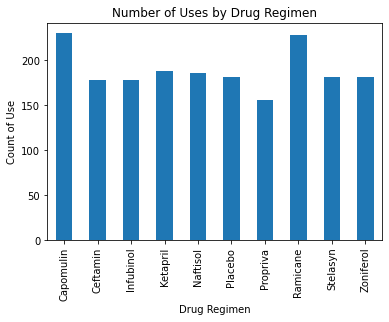

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

# generate count of unique time points per drug
drug_regimen = grouped_mice['Timepoint'].count()

#create bar plot with title & axis labels
drug_regimen.plot(kind="bar", title = "Number of Uses by Drug Regimen", ylabel = "Count of Use")


Text(0, 0.5, 'Total # of Measurements Taken')

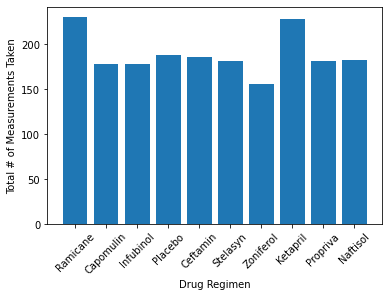

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x = all_data["Drug Regimen"].unique()
plt.bar(x, grouped_mice['Timepoint'].count())

plt.xlabel("Drug Regimen")
plt.xticks(rotation = 45)
plt.ylabel("Total # of Measurements Taken")


<AxesSubplot:title={'center':'Mice Gender Distribution'}, ylabel='Sex'>

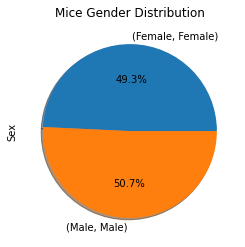

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#group by gender
mice_gender = all_data.groupby(['Sex'])

gender_count = mice_gender['Sex'].value_counts()

gender_count.plot(kind = "pie", title = "Mice Gender Distribution",  autopct = '%1.1f%%', shadow = True)

Text(0.5, 1.0, 'Mice Gender Distribution')

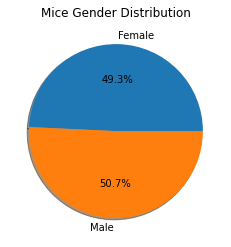

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
gender_count = mice_gender['Sex'].value_counts()

plt.pie(gender_count, labels = labels, autopct='%1.1f%%', shadow = True)
plt.title("Mice Gender Distribution")

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

#start by getting the last (greatest) timepoint for each mouse 

#group mice based on all data to kick off
mice_group = all_data.groupby(['Mouse ID'])

#calculate the biggest time 
biggest_time = pd.DataFrame(mice_group['Timepoint'].max())

#merge with all_based on mouse ID and timepoint
new_data = pd.merge(all_data,biggest_time, on=["Mouse ID", "Timepoint"])

new_data

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = all_data["Drug Regimen"].unique()
mice = all_data["Mouse ID"].unique()

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#Q1 = df['nb'].quantile(0.25)
#Q3 = df['nb'].quantile(0.75)
#IQR = Q3 - Q1
 
Q1 = new_data['Tumor Volume (mm3)'].quantile(0.25)
Q3 = new_data['Tumor Volume (mm3)'].quantile(0.75)
IQR = Q3-Q1

    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    tumor_vol = 0 
    
    for mouse in mice:
        
    tumor_vol_data.append(tumor_vol)

#for drug in treatments:
   
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds

    
#a=[]
#for i in range(5):    
    #a.append(i)
#print(a)
# [0, 1, 2, 3, 4]

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [13]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Mouse Id = s185 

mouse_id = 's185'

#filter to only that mouse 
df = all_data[all_data['Mouse ID'] == mouse_id]

df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


Text(0.5, 1.0, 'Tumor Volume over Timepoints')

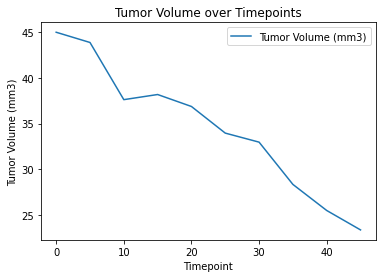

In [14]:
df_small = df.drop(['Age_months', 'Weight (g)', 'Metastatic Sites'], axis=1)

df_small.set_index('Timepoint').plot.line()

plt.ylabel('Tumor Volume (mm3)')

plt.title('Tumor Volume over Timepoints')

In [22]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scatter_df = all_data[all_data['Drug Regimen'] == 'Capomulin']

#group by mouse
mouse = pd.DataFrame(scatter_df.groupby(['Mouse ID']))

mouse
#calculate average by mouse and store in new dataset


,0,1
0,b128,Mouse ID Drug Regimen Sex Age_months ...
1,b742,Mouse ID Drug Regimen Sex Age_months W...
2,f966,Mouse ID Drug Regimen Sex Age_months We...
3,g288,Mouse ID Drug Regimen Sex Age_months W...
4,g316,Mouse ID Drug Regimen Sex Age_months ...
5,i557,Mouse ID Drug Regimen Sex Age_months ...
6,i738,Mouse ID Drug Regimen Sex Age_months ...
7,j119,Mouse ID Drug Regimen Sex Age_months ...
8,j246,Mouse ID Drug Regimen Sex Age_months ...
9,l509,Mouse ID Drug Regimen Sex Age_months W...


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
